# Explorative Datenanalyse für Bachelorarbeit

**Ersteller:** Hai Hung Nguyen

**Bearbeitungszeitraum:** 30.05.2025  - 06.06.2025

**Hinweis:** Für konkrete Informationen zum Datensatz bitte siehe Datenmanagementplan und README-Datei.


# A.Einleitung und Zielsetzung

Motivation
Fragenstellungen
Überblick
Methodik
Prozessbeschreibung


# B.Datensatzanalyse

## 1. Datenverständnis & -struktur

### 1.1. Daten und Bibliotheken loaden

In [57]:
# Packages importieren
import pandas as pd
import matplotlib.pyplot as plt
from unicodedata import numeric
%matplotlib inline
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, spearmanr
import itertools
import dython

from IPython.display import display
from IPython import get_ipython
import uuid
import os

In [58]:
'''
from ucimlrepo import fetch_ucirepo

# Datensatz abrufen
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Separat als Feature- und Target-Dataframe
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
'''

'\nfrom ucimlrepo import fetch_ucirepo\n\n# Datensatz abrufen\ncdc_diabetes_health_indicators = fetch_ucirepo(id=891)\n\n# Separat als Feature- und Target-Dataframe\nX = cdc_diabetes_health_indicators.data.features\ny = cdc_diabetes_health_indicators.data.targets\n'

In [59]:
# Backup als .csv-Datei
#X.to_csv("features.csv", index=False)
#y.to_csv("targets.csv", index=False)

In [60]:
X = pd.read_csv('features.csv')
y = pd.read_csv('targets.csv')

Der Datensatz "CDC Diabetes Health Indicators" wurde direkt aus dem UCI-Repository abgerufen. Er wurde in zwei separate DateFrames geteilt und wurde unter den Variablen zugewiesen:
</br>
features --> X
</br>
targets --> y

Zur Sicherung des Bearbeitungsstandes wurden beide DataFrames jeweils als CSV-Datei exportiert und unter den folgenden Dateiname abgelegt:
</br>
X --> features.csv
</br>
y --> targets.csv

### 1.2. Datengewinnung

In [61]:
# Überblick zum Features-DataFrame
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

Der Feature-DataFrame umfasst insgesamt 253.680 Beobachtungen mit 21 Merkmalen, wobei alle Werte vollständig (non-null) vorliegen:
- 3 Merkmale sind interger: 'BMI', 'MentHlth', 'PhysHlth'
- 14 Merkmale sind binär kodiert: 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseasorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
- 4 Merkmale sind kategorisch bzw. ordinal: 'GenHlth', 'Age', 'Education', 'Income'

Diese Merkmale basieren auf einem Fragebogen, der demografische Angaben, Gesundheitsverhalten sowie medizinische Vorgeschichte der Befragten erfasst. Weitere Details zur Umfrage sind im Datenmanagementplan dokumentiert.

|       Feature        | Beschreibung bzw. konkrete Frage                                                                                                                                   | Wertebereich                                                                                                                                                                                                                                                                                                                                                                      |
|:--------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|        HighBP        | Hohes Blutdruck-Risiko<br/>Erwachsene, bei denen jemals hoher Bluthochdruck von einer Fachkraft diagnostiziert wurde.                                              | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|       HighChol       | Hohes Cholesterin<br/>Erwachsene, bei denen jemals ein zu hoher Cholesterinspiegel von einer Fachkraft diagnostiziert wurde.                                       | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|      CholCheck       | Cholesterin-Check in den letzten fünf Jahren                                                                                                                       | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|         BMI          | Body-Mass-Index                                                                                                                                                    | kontinuierliche Zahl                                                                                                                                                                                                                                                                                                                                                              |
|        Smoker        | Haben Sie in Ihrem gesamten Leben mindestens 100 Zigaretten (= 5 Packungen) geraucht?                                                                              | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|        Stroke        | Schlaganfall-Anamnese<br/>Erwachsene, bei denen jemals ein Schlaganfall von einer Fachkraft diagnostiziert wurde.                                                  | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
| HeartDiseaseorAttack | Herz-Kreislauf-Erkrankung<br/> Erwachsene, die jemals angegeben haben, an einer koronaren Herzkrankheit oder einem Herzinfarkt gelitten zu haben.                  | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|     PhysActivity     | Körperliche Aktivität<br/>Erwachsene, die in den letzten 30 Tagen außer ihrer regulären Arbeit körperliche Aktivität oder Sport ausgeübt haben.                    | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|        Fruits        | Verzehr von Obst mindestens einmal pro Tag                                                                                                                         | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|       Veggies        | Verzehr von Gemüse mindestens einmal pro Tag                                                                                                                       | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|  HvyAlcoholConsump   | Alkoholkonsum<br/> männliche Erwachsene mit mehr als 14 alkoholischen Getränken pro Woche & weibliche Erwachsene mit mehr als 7 alkoholischen Getränken pro Woche. | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|    AnyHealthcare     | Erwachsene, die irgendeine Form der Gesundheitsversorgung haben, einschließlich Krankenversicherung, prepaid-Pläne (z.B. HMO), oder staatlicher Programme.         | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|     NoDocbcCost      | Gab es in den letzten 12 Monaten schon Mals, wenn Sie einen Arzt aufsuchen mussten, dies aber aus finanziellen Gründen nicht konnten?                              | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|       GenHlth        | Wie würden Sie insgesamt Ihren Gesundheitszustand beschreiben?                                                                                                     | 5-stufiger Ordinalskala:<br/>1 = "Sehr gut" bis 5 = "Sehr schlecht"                                                                                                                                                                                                                                                                                                               |
|       MentHlth       | Psychische Gesundheit (Stress, Depression, emotionale Störung,...)<br/>An wie viele Tagen in den letzten 30 Tagen war Ihre psychische Gesundheit nicht gut?        | 0-30                                                                                                                                                                                                                                                                                                                                                                              |
|       PhysHlth       | Körperliche Gesundheit (Krankheit, Verletzung,...)<br/>An wie viele Tagen in den letzten 30 Tagen war Ihre körperliche Gesundheit nicht gut?                       | 0-30                                                                                                                                                                                                                                                                                                                                                                              |
|       DiffWalk       | Bewegungsfähigkeit<br/>Haben Sie Schwierigkeiten beim Gehen oder Treppensteigen?                                                                                   | 0 = "Nein"<br/>1 = "Ja"                                                                                                                                                                                                                                                                                                                                                           |
|         Sex          | Geschlecht                                                                                                                                                         | 0 = "weiblich"<br/>1 = "männlich"                                                                                                                                                                                                                                                                                                                                                 |
|         Age          | Altersgruppe                                                                                                                                                       | 13 Kategorien:<br/>1 = "18-24 Jahre"<br/>2 = "25-29 Jahre"<br/>3 = "30-34 Jahre"<br/>4 = "35-39 Jahre"<br/>5 = "40-44 Jahre"<br/>6 = "45-49 Jahre"<br/>7 = "50-54 Jahre"<br/>8 = "55-59 Jahre"<br/>9 = "60-64 Jahre"<br/>10 = "65-69 Jahre"<br/>11 = "70-74 Jahre"<br/>12 = "75-79 Jahre"<br/>13 = "80 Jahre und älter"                                                           |
|      Education       | Bildungsabschluss                                                                                                                                                  | 6 Kategorien:<br/>1 = "Kein Schulbesuch bzw. nur Kindergarten"<br/>2 = "Klassen 1-8" <br/>3 = "Klassen 9-11"<br/>4 = "Klasse 12 oder Abitur"<br/>5 = "College (Dauer 1-3 Jahren)"<br/>6 = "College (Dauer mehr als 4 Jahren)"                                                                                                                                                     |
|        Income        | Einkommen                                                                                                                                                          | 8-stufiger Ordinalskala:<br/> 1 = "weniger als 10 Tsd. USD" <br/>2 = "10 Tsd. USD  bis unter 15 Tsd. USD" <br/>3 = "15 Tsd. USD  bis unter 20 Tsd. USD" <br/>4 = "20 Tsd. USD  bis unter 25 Tsd. USD" <br/>5 = "25 Tsd. USD  bis unter 35 Tsd. USD" <br/>6 = "35 Tsd. USD  bis unter 50 Tsd. USD" <br/>7 = "50 Tsd. USD  bis unter 75 Tsd. USD" <br/>8 = "75 Tsd. USD  oder mehr" |

Nachfolgend sind exemplarische Datenzeilen aufgeführt, die alle Merkmale im Features-DataFrame zeigen:

In [62]:
print(X.head(5))

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0    

In [63]:
# Überblick zum Targets-DataFrame
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB
None


Der Target-DataFrame enthält insgesamt 253.680 Beobachtungen und entspricht damit der Anzahl der Beobachtungen im Features-DataFrame. Er besteht aus einer einzelnen Zielvariable 'diabetes_binary', die den diagnostizierten Diabetesstatus angibt.

| Target          | Beschreibung   | Wertebereich                                            |
|:----------------|:---------------|:--------------------------------------------------------|
| diabetes_binary | Diagnosestatus | 0 = "kein Diabetes"<br/>1 = "Prädiabetes oder Diabetes" |

Nachfolgend sind exemplarische Datenzeilen aufgeführt, die Variable im Target-DataFrame zeigen:

In [64]:
print(y.head(5))

   Diabetes_binary
0                0
1                0
2                0
3                0
4                0


In [65]:
# Zielordner für Plots
plot_dir = "exportierte_plots"
os.makedirs(plot_dir, exist_ok=True)

def export_plot_to_file(result):
    if isinstance(result, plt.Figure):
        filename = f"{plot_dir}/plot_{uuid.uuid4().hex[:6]}.png"
        result.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"📊 Plot automatisch gespeichert: {filename}")

# Hook registrieren
ip = get_ipython()
ip.events.register('post_run_cell', export_plot_to_file)




## 2. Explorative Datenanalyse

### 2.1. Univariate Analyse
In diesen Sektion werden die Datenverteilung von Merkmalen betrachtet.

#### 2.1.1. Medizinische Vorgeschichte und Risikofaktoren

Plot saved as: plot_d01b9e94.png


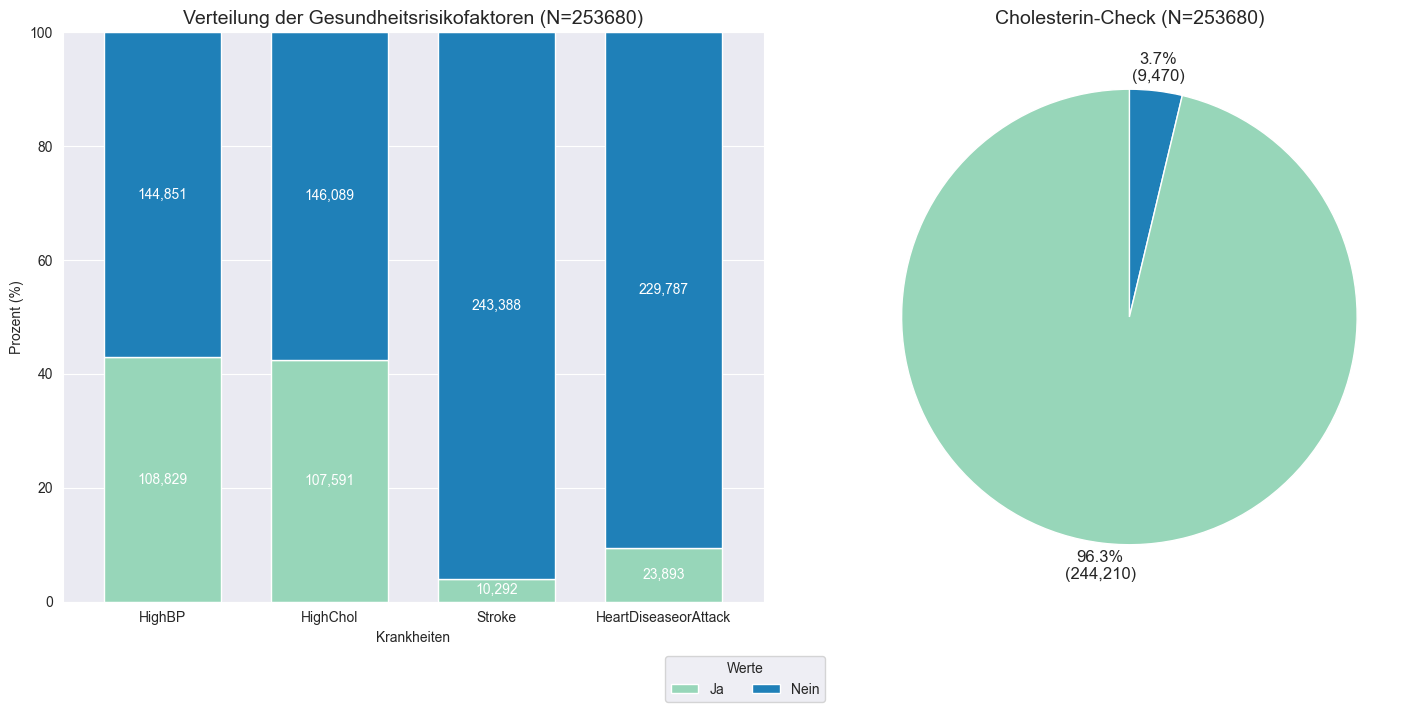

In [66]:
colors = sns.color_palette("YlGnBu", n_colors=2)
color_ja, color_nein = colors


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
cols = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']

percent_data = pd.DataFrame({
    col: X[col].value_counts(normalize=True) * 100 for col in cols
}).T[[1, 0]]
absolute_data = pd.DataFrame({
    col: X[col].value_counts() for col in cols
}).T[[1, 0]]

percent_data.plot(
    kind='bar', stacked=True, ax=ax1,
    color=[color_ja, color_nein], width=0.7,  legend=False
)
ax1.set_ylim(0, 100)
ax1.set_ylabel('Prozent (%)')
ax1.set_xlabel('Krankheiten')
ax1.set_title('Verteilung der Gesundheitsrisikofaktoren (N=253680)', fontsize=14)
ax1.set_xticklabels(percent_data.index, rotation=0)

for i, idx in enumerate(percent_data.index):
    pct_ja = percent_data.loc[idx, 1]
    pct_nein = percent_data.loc[idx, 0]
    abs_ja = absolute_data.loc[idx, 1]
    abs_nein = absolute_data.loc[idx, 0]
    ax1.text(i, pct_ja/2, f'{int(abs_ja):,}', ha='center', va='center', color='white')
    ax1.text(i, pct_ja + pct_nein/2, f'{int(abs_nein):,}', ha='center', va='center', color='white')

counts = X['CholCheck'].value_counts().sort_index()

pie_colors = [color_nein, color_ja]

wedges, texts, autotexts = ax2.pie(
    counts,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(counts)/100):,})',
    startangle=90,
    counterclock=False,
    colors=pie_colors,
    pctdistance=1.1,
    textprops={'fontsize': 12}
)
ax2.set_title('Cholesterin-Check (N=253680)', fontsize=14)

legend_handles = [
    Patch(facecolor=color_ja, label='Ja'),
    Patch(facecolor=color_nein, label='Nein')
]
fig.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=2,
    title='Werte'
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

Der gruppierte Balkendiagramm veranschaulicht die Verteilung von vier zentralen Gesundheitsrisikofaktoren in der Stichprobe. Untersucht wurden Hochblutdruck, hoher Cholesterinspiegel, Schlaganfall und Herzerkrankungen. Am häufigsten treten mit 108 829 Personen (42.9%) Hochblutdruck sowie mit 107 591 Personen (42.4%) ein hoher Cholesterinspiegel auf. 9% der Befragten geben an, an einer Herzerkrankung zu leiden, und 4% hatten mindestens einmal einen Schlaganfall.

Das Donut-Diagramm zeigt zudem, dass 96.3% der Teilnehmenden in der Vergangenheit bereits ihre Cholesterinwerte haben überprüfen lassen.

Plot saved as: plot_3eb55b02.png


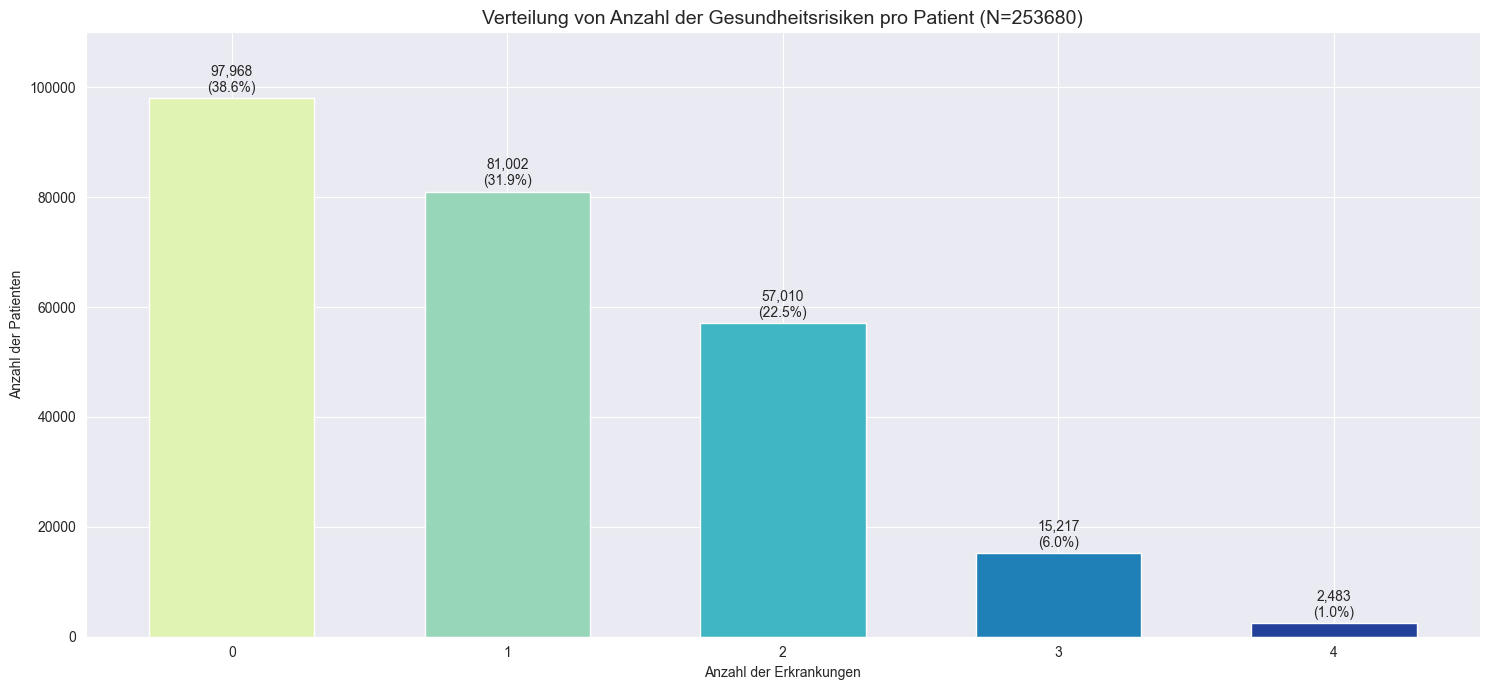

In [67]:
cols = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']
n_conditions = X[cols].sum(axis=1)
counts = n_conditions.value_counts().sort_index().reindex(range(5), fill_value=0)
percentages = counts / len(X) * 100

colors = sns.color_palette('YlGnBu', 5)

fig, ax = plt.subplots(figsize=(15, 7))

bars = ax.bar(counts.index, counts.values, color=colors, width=0.6)

for bar, count, pct in zip(bars, counts.values, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + len(X)*0.0025,
            f"{count:,}\n({pct:.1f}%)", ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Anzahl der Erkrankungen')
ax.set_ylabel('Anzahl der Patienten')
ax.set_title('Verteilung von Anzahl der Gesundheitsrisiken pro Patient (N=253680)', fontsize=14)
ax.set_xticks(range(5))
ax.set_xticklabels(range(5))
ax.set_ylim(0, 110000)

plt.tight_layout()
plt.show()

Vorbestehende Erkrankungen zählen zu den zentralen Risikofaktoren für eine Diabetes-Diagnose. In unserer Stichprobe gaben 38.6% der Befragten an, keine der vier untersuchten Grunderkrankungen zu haben. Demgegenüber wiesen 61.4% mindestens eine der folgenden Erkrankungen auf: Bluthochdruck, hoher Cholesterinspiegel, Schlaganfall oder Herzerkrankung.

Plot saved as: plot_7024d86d.png


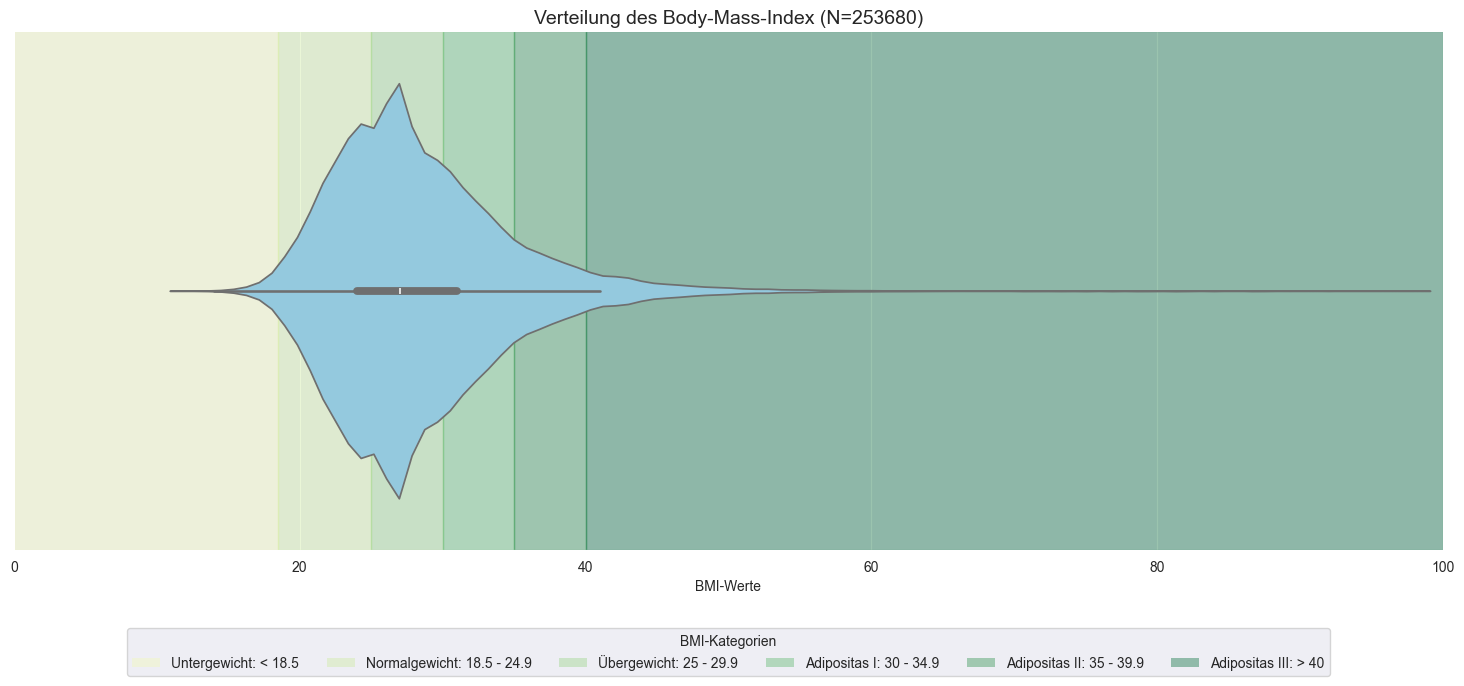

In [68]:
bmi_categories = [
    (0, 18.5, 'Untergewicht: < 18.5'),
    (18.5, 25, 'Normalgewicht: 18.5 - 24.9'),
    (25, 30, 'Übergewicht: 25 - 29.9'),
    (30, 35, 'Adipositas I: 30 - 34.9'),
    (35, 40, 'Adipositas II: 35 - 39.9'),
    (40, 100, 'Adipositas III: > 40')
]

colors = sns.color_palette('YlGn', len(bmi_categories))

plt.figure(figsize=(15, 7))
ax = plt.gca()

for (start, end, label), color in zip(bmi_categories, colors):
    ax.axvspan(start, end, color=color, alpha=0.4)

sns.violinplot(x=X['BMI'], inner='box', color='skyblue', ax=ax)

ax.set_xlim(0, 100)
ax.set_title('Verteilung des Body-Mass-Index (N=253680)', fontsize=14)
ax.set_xlabel('BMI-Werte')

legend_patches = [Patch(facecolor=color, edgecolor='none', alpha=0.4, label=label)
                  for (_, _, label), color in zip(bmi_categories, colors)]
ax.legend(handles=legend_patches, title='BMI-Kategorien',
          bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol = len(bmi_categories), borderaxespad=0)

plt.tight_layout()
plt.show()

In [69]:
X['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

Die BMI Plot zeigt eine auffällige Gewichtsverteilung: Nur rund 25% der Teilnehmenden liegen im Normalgewichtsbereich, während über 70% entweder übergewichtig oder adipös sind. Diese hohe Prävalenz von Übergewicht und Adipositas trägt maßgeblich zu den zuvor beobachteten Grunderkrankungen bei, insbesondere zu der hohen Häufigkeit von Bluthochdruck und hohem Cholesterinspiegel.

#### 2.1.2. Gesundheitsbezogenes Verhalten

Plot saved as: plot_ed5a0345.png


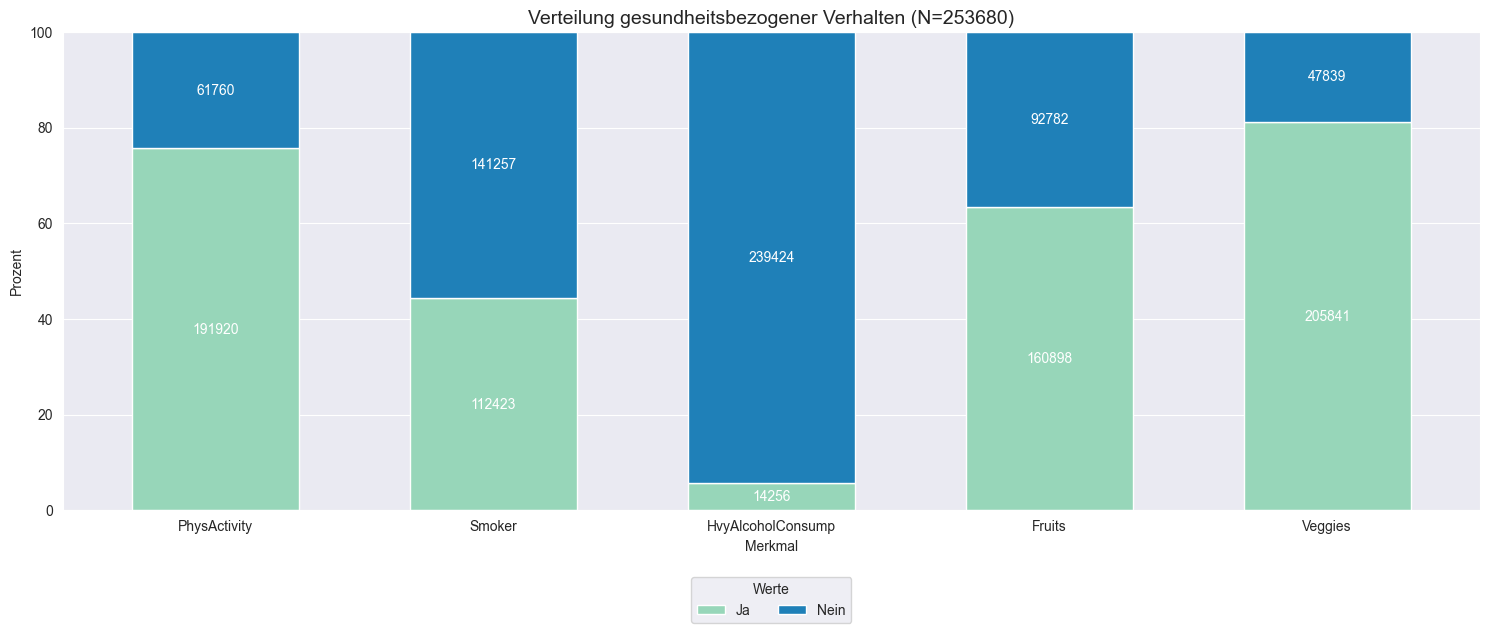

In [70]:
cols = ['PhysActivity', 'Smoker', 'HvyAlcoholConsump', 'Fruits', 'Veggies']

percent_data = pd.DataFrame({
    col: X[col].value_counts(normalize=True) * 100 for col in cols
}).T[[1, 0]]

absolute_data = pd.DataFrame({
    col: X[col].value_counts() for col in cols
}).T[[1, 0]]

colors = sns.color_palette("YlGnBu", n_colors=2)

fig, ax = plt.subplots(figsize=(15, 7))
percent_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.6)

ax.set_ylim(0, 100)
ax.set_ylabel('Prozent')
ax.set_xlabel('Merkmal')
ax.set_title('Verteilung gesundheitsbezogener Verhalten (N=253680)', fontsize=14)
plt.xticks(rotation=0)

ax.legend(['Ja', 'Nein'], loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=2, title='Werte')

for i, col in enumerate(cols):
    ja_hoehe = percent_data.loc[col, 1]
    nein_hoehe = percent_data.loc[col, 0]
    ja_wert = absolute_data.loc[col, 1]
    nein_wert = absolute_data.loc[col, 0]

    ax.text(i, ja_hoehe / 2, str(ja_wert), ha='center', va='center', color='white')

    ax.text(i, ja_hoehe + (nein_hoehe / 2), str(nein_wert), ha='center', va='center', color='white')

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.show()

Weiterhin wurden  gesundheitsbezogene Verhaltensweisen der Teilnehmenden untersucht, insbesondere ihr physischen Aktivitäten, der Konsum potenziell schädlicher Substanzen und ihre Ernährungsgewohnheiten. Das Ergebnis zeichnet ein weitgehend positives Bild: Die Mehrheit isst täglich Obst und Gemüse. Die meisten gaben an, in den letzten 30 Tagen zumindest gelegentlich sportlich aktiv gewesen zu sein. Stark erhöhter Alkoholkonsum ist selten. Allerdings haben etwa 44 % der Befragten im Laufe ihres Lebens mindestens 100 Zigaretten geraucht.

Zwar zeigt sich ein überwiegend gesundes Ernährungs- und Aktivitätsverhalten, jedoch bleibt der BMI-Werten hoch und Prävalenzen von Bluthochdruck und erhöhtem Cholesterin.

#### 2.1.3. Zugang zur Gesundheitssversorgung

Plot saved as: plot_4d327f51.png


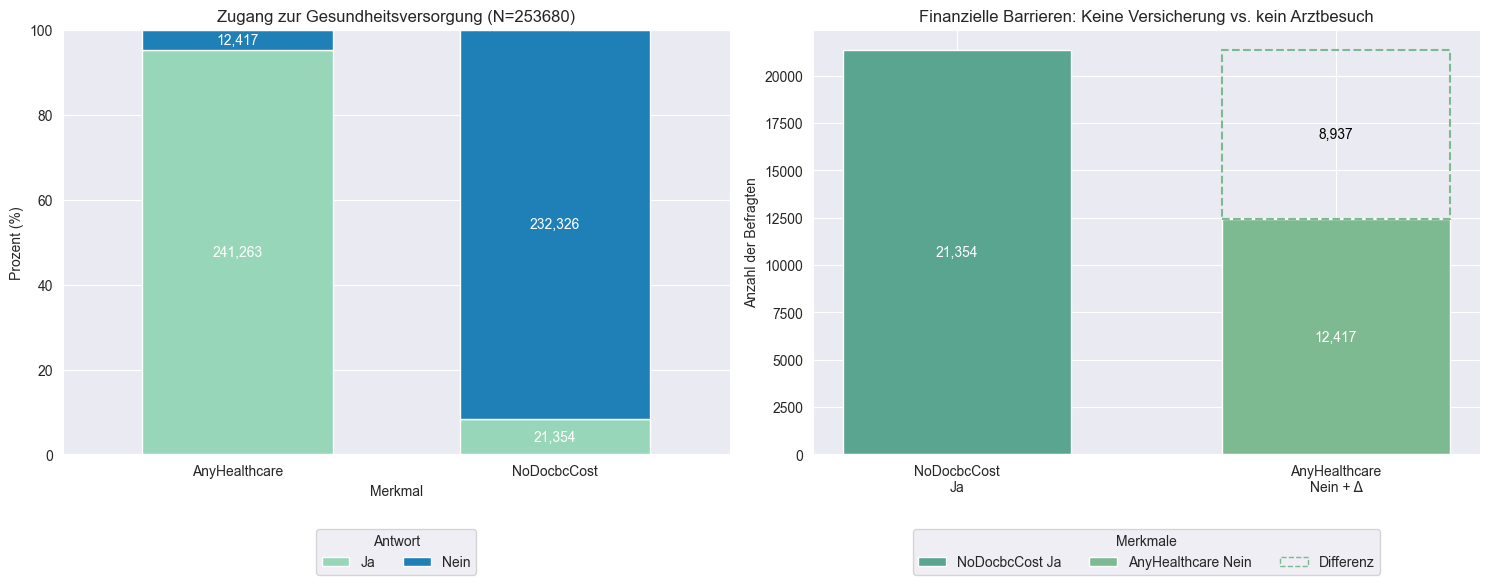

In [71]:
palette = sns.color_palette("YlGnBu", n_colors=2)
color_ja, color_nein = palette
color_1 = sns.color_palette("crest")[1]
color_2 = sns.color_palette("crest")[0]

cols = ['AnyHealthcare', 'NoDocbcCost']
percent_data = pd.DataFrame({
    col: X[col].value_counts(normalize=True) * 100 for col in cols
}).T[[1, 0]]
absolute_data = pd.DataFrame({
    col: X[col].value_counts() for col in cols
}).T[[1, 0]]

cnt_yes_nocost = X['NoDocbcCost'].sum()
cnt_no_anyhc   = (X['AnyHealthcare'] == 0).sum()
diff_val       = cnt_yes_nocost - cnt_no_anyhc

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=False)

percent_data.plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=[color_ja, color_nein],
    width=0.6,
    legend=False
)
ax1.set_ylim(0, 100)
ax1.set_ylabel('Prozent (%)')
ax1.set_xlabel('Merkmal')
ax1.set_xticklabels(percent_data.index, rotation=0)
ax1.set_title('Zugang zur Gesundheitsversorgung (N=253680)')

for i, idx in enumerate(percent_data.index):
    p_ja = percent_data.loc[idx, 1]
    p_ne = percent_data.loc[idx, 0]
    a_ja = absolute_data.loc[idx, 1]
    a_ne = absolute_data.loc[idx, 0]
    ax1.text(i, p_ja/2, f'{int(a_ja):,}', ha='center', va='center', color='white')
    ax1.text(i, p_ja + p_ne/2, f'{int(a_ne):,}', ha='center', va='center', color='white')

handles1 = [
    Patch(facecolor=color_ja,  label='Ja'),
    Patch(facecolor=color_nein, label='Nein')
]
ax1.legend(
    handles=handles1,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=2,
    title='Antwort'
)

x = [0, 1]
ax2.bar(x[0], cnt_yes_nocost, color=color_1, width=0.6)
ax2.text(x[0], cnt_yes_nocost/2, f'{cnt_yes_nocost:,}', ha='center', va='center', color='white')

ax2.bar(x[1], cnt_no_anyhc, color=color_2, width=0.6)
ax2.text(x[1], cnt_no_anyhc/2, f'{cnt_no_anyhc:,}', ha='center', va='center', color='white')

ax2.bar(
    x[1], diff_val,
    bottom=cnt_no_anyhc,
    color='none',
    edgecolor=color_2,
    linestyle='--',
    linewidth=1.5,
    width=0.6
)
ax2.text(x[1], cnt_no_anyhc + diff_val/2, f'{diff_val:,}', ha='center', va='center', color='black')

ax2.set_xticks(x)
ax2.set_xticklabels(['NoDocbcCost\nJa', 'AnyHealthcare\nNein + Δ'])
ax2.set_ylabel('Anzahl der Befragten')
ax2.set_title('Finanzielle Barrieren: Keine Versicherung vs. kein Arztbesuch')

handles2 = [
    Patch(facecolor=color_1,  label='NoDocbcCost Ja'),
    Patch(facecolor=color_2, label='AnyHealthcare Nein'),
    Patch(facecolor='none', edgecolor=color_2, linestyle='--', label='Differenz')
]
ax2.legend(
    handles=handles2,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.3),
    ncol=3,
    title='Merkmale'
)

fig.subplots_adjust(wspace=0.4)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

Weiter wird der Zugang zur Gesundheitsversorgung bewertet: 95% der Befragten sind durch eine Form der Krankenversicherung abgesichert, während rund 5% keine Versicherung haben. 8.42% (21 354 Fälle) der Befragten berichteten, in den letzten 12 Monaten aus Kostengründen auf notwendige Arztbesuche verzichtet zu haben. Neben den 12471 Unversicherten gibt es dazu noch 8937 Versicherte, die trotzdem auf Arztbesuche verzichten mussten, vermutlich weil ihre Versicherung Zuzahlungen nicht deckt oder administrative Hürden bestehen.

#### 2.1.4. Subjektive Gesundheitswahrnehmung

Plot saved as: plot_f34b517c.png


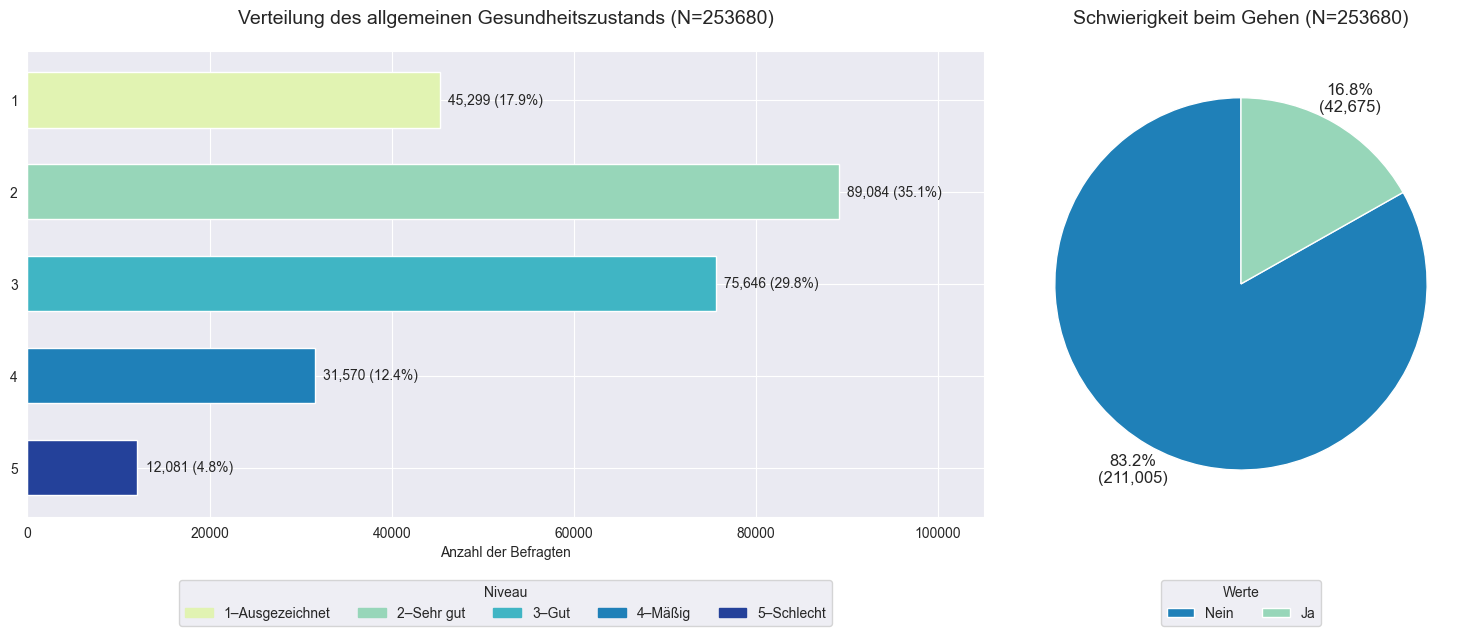

In [72]:
barh_palette = sns.color_palette("YlGnBu", n_colors=5)
pie_colors   = sns.color_palette("YlGnBu",   n_colors=2)

fig2, (ax3, ax4) = plt.subplots(
    1, 2,
    figsize=(15, 7),
    gridspec_kw={'width_ratios': [2, 1]}
)
fig2.subplots_adjust(wspace=0.4)

counts = X['GenHlth'].value_counts().reindex([1,2,3,4,5]).fillna(0).astype(int)
pct    = counts / counts.sum() * 100
y_pos  = range(len(counts))

ax3.barh(y=y_pos, width=counts.values, color=barh_palette, height=0.6)
ax3.set_yticks(y_pos)
ax3.set_yticklabels([str(i) for i in [1,2,3,4,5]])
ax3.invert_yaxis()
ax3.set_xlabel('Anzahl der Befragten')
ax3.set_xlim(0, 105000)

max_c = counts.max()
for i, (val, p) in enumerate(zip(counts.values, pct.values)):
    ax3.text(val + max_c*0.01, i, f'{val:,} ({p:.1f}%)', va='center')

ax3.set_title('Verteilung des allgemeinen Gesundheitszustands (N=253680)', pad=20, fontsize=14)

legend3 = ax3.legend(
    handles=[Patch(color=c, label=label)
             for c, label in zip(barh_palette, ['1–Ausgezeichnet','2–Sehr gut','3–Gut','4–Mäßig','5–Schlecht'])],
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=5,
    title='Niveau'
)

counts_pw = X['DiffWalk'].value_counts().sort_index()
labels_pw = ['Nein', 'Ja']
wedges, texts, autotexts = ax4.pie(
    counts_pw,
    autopct=lambda p: f'{p:.1f}%\n({int(p*counts_pw.sum()/100):,})',
    startangle=90,
    counterclock=True,
    colors=pie_colors[::-1],
    textprops={'fontsize':12},
    pctdistance=1.155
)
ax4.set_title('Schwierigkeit beim Gehen (N=253680)', pad=20, fontsize=14)

legend4 = ax4.legend(
    wedges,
    labels_pw,
    title='Werte',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=2
)

fig2.align_xlabels((ax3, ax4))
fig2.align_ylabels((ax3, ax4))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Die subjektive Gesundheitswahrnehmung wurde erhoben, indem die Teilnehmenden ihren allgemeinen Gesundheitszustand einschätzten. Mehr als die Hälfte bewertete diesen als „gut“ bis „sehr gut“, während 12.4% ihn als „mäßig“ und etwa 5 % als „schlecht“ einstufen. Darüber hinaus gaben 83.2% der Befragten an, keinerlei Schwierigkeiten beim Gehen zu haben.

Plot saved as: plot_8165d078.png


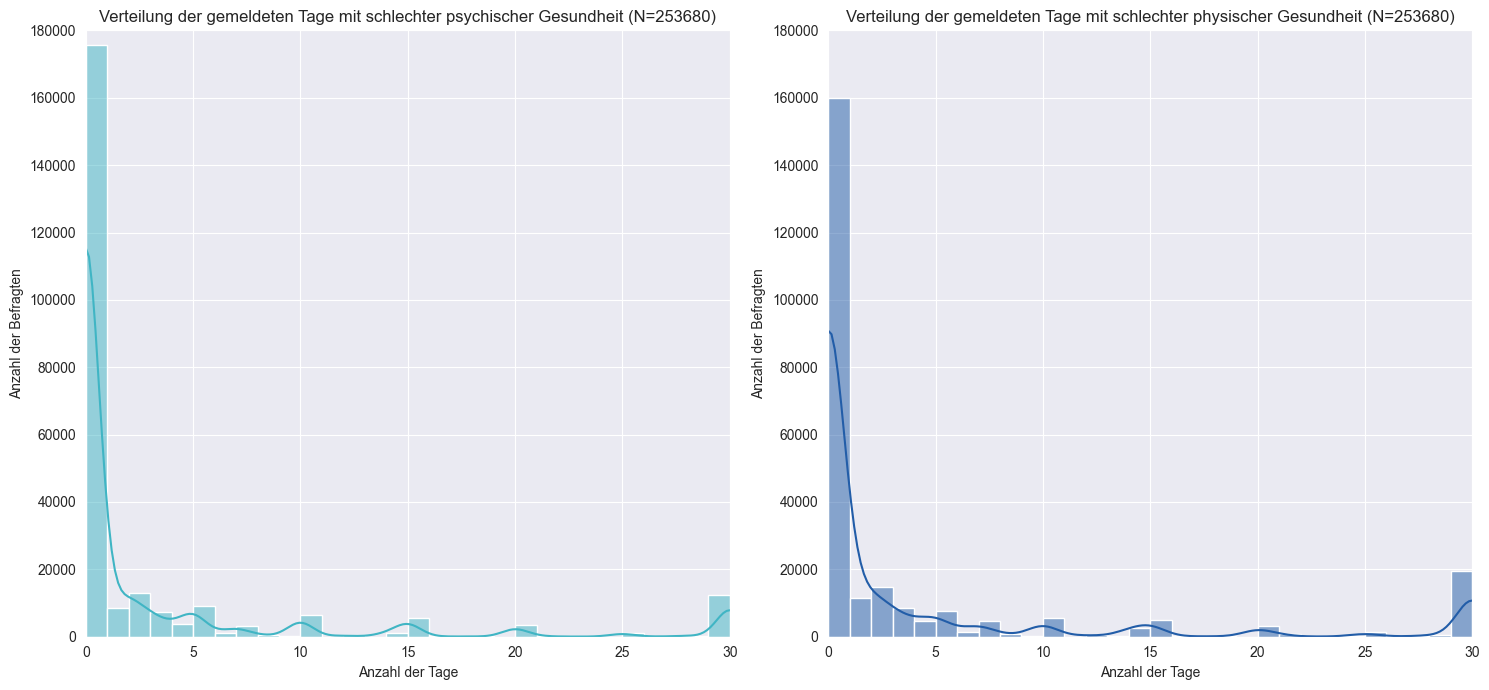

In [73]:
hist_colors = sns.color_palette('YlGnBu', n_colors=3)

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(
    x=X['MentHlth'],
    binwidth=1,
    kde=True,
    ax=ax1,
    color=hist_colors[1]
)
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 180000)
ax1.set_xlabel('Anzahl der Tage')
ax1.set_ylabel('Anzahl der Befragten')
ax1.set_title('Verteilung der gemeldeten Tage mit schlechter psychischer Gesundheit (N=253680)', fontsize=12)

sns.histplot(
    x=X['PhysHlth'],
    binwidth=1,
    kde=True,
    ax=ax2,
    color=hist_colors[2]
)
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 180000)
ax2.set_xlabel('Anzahl der Tage')
ax2.set_ylabel('Anzahl der Befragten')
ax2.set_title('Verteilung der gemeldeten Tage mit schlechter physischer Gesundheit (N=253680)', fontsize=12)

fig1.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

Weiter zeigen die Diagramme zur selbstberichteten Gesundheitsdauer eine deutlich rechtsschiefe Verteilung: Die meisten Befragten geben an, in letzten 30 Tagen keine oder nur sehr wenige Tage mit schlechter psychischer bzw. physischer Gesundheit erlebt zu haben.

Insgesamt berichten die Teilnehmenden von mehr Tagen mit schlechter physischer als mit schlechter psychischer Verfassung.

Ein kleiner Teil gibt sogar an, einen ganzen Monat lang unter psychischen oder physischen Beeinträchtigungen gelitten zu haben, was auf chronische Belastungen in beiden Bereichen hindeutet.

#### 2.1.5. Soziodemographische Merkmale

Plot saved as: plot_81f59025.png


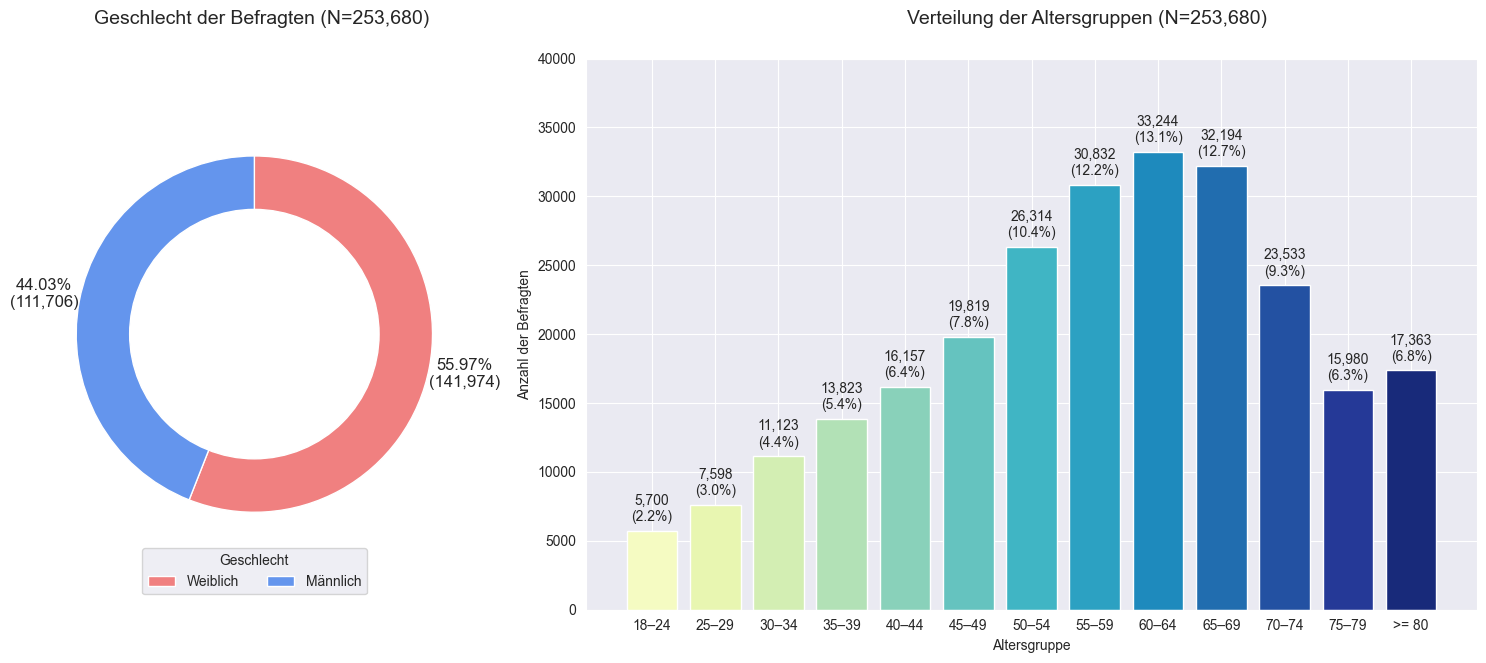

In [74]:
sex_counts = X['Sex'].value_counts().sort_index()
sex_total = sex_counts.sum()
sex_labels = ['Weiblich', 'Männlich']
sex_colors = ['lightcoral', 'cornflowerblue']

def make_autopct(total):
    def my_autopct(pct):
        absolute = int(round(pct * total / 100.0))
        real_pct = absolute / total * 100
        return f'{real_pct:.2f}%\n({absolute:,})'
    return my_autopct

age_labels_map = {
    1: "18–24",  2: "25–29",  3: "30–34",  4: "35–39",  5: "40–44",
    6: "45–49",  7: "50–54",  8: "55–59",  9: "60–64", 10: "65–69",
    11: "70–74", 12: "75–79", 13: ">= 80"
}
age_counts = X['Age'].value_counts().sort_index()
age_labels = [age_labels_map[i] for i in age_counts.index]
age_total = age_counts.sum()
age_percent = age_counts / age_total * 100
age_colors = sns.color_palette("YlGnBu", n_colors=len(age_counts))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [1, 2]})
fig.subplots_adjust(wspace=0.3)

wedges, _, autotexts = ax1.pie(
    sex_counts,
    labels=None,
    autopct=make_autopct(sex_total),
    pctdistance=1.2,
    labeldistance=1.0,
    startangle=90,
    counterclock=False,
    colors=sex_colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(centre_circle)

bars = ax2.bar(x=age_labels, height=age_counts.values, color=age_colors)
ax2.set_xlabel('Altersgruppe')
ax2.set_ylabel('Anzahl der Befragten')
ax2.set_ylim(0, 40000)
ax2.tick_params(axis='x', rotation=0)

for bar, val, pct in zip(bars, age_counts.values, age_percent.values):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 500,
        f'{val:,}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

ax1.legend(
    wedges,
    sex_labels,
    title='Geschlecht',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=2
)

fig.text(0.18, 0.92, f'Geschlecht der Befragten (N={sex_total:,})', fontsize=14, ha='center')
fig.text(0.73, 0.92, f'Verteilung der Altersgruppen (N={age_total:,})', fontsize=14, ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

Die Verteiltung von Geschlecht der Teilnehmer ist etwas mehr Frauen als Männer (55.97% vs. 44.03%), wobei insgesamt noch relativ ausgeglichen ist. Die Altersverteilung ist deutlich linksschief: Nur 2.2% der Teilnehmenden sind junge Erwachsene, 12.8% im Alter von 25 bis 40 Jahren. Die größte Gruppe bilden die ab 50-Jährigen (70.8%), die aufgrund Altersbedingung potenziell erhöhtes Risiko für die Entwicklung von Diabetes aufweisen.

Plot saved as: plot_05a098ea.png


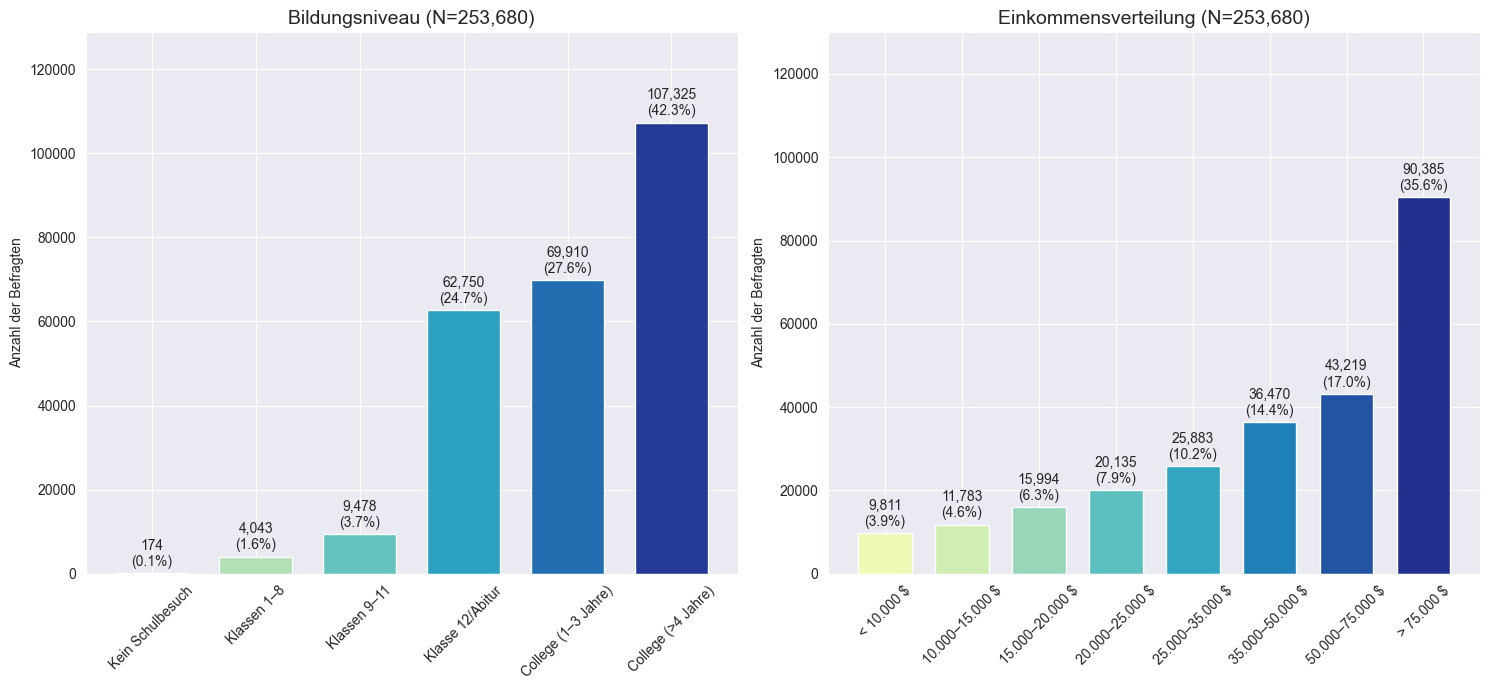

In [75]:
edu_labels_map = {
    1: "Kein Schulbesuch",
    2: "Klassen 1–8",
    3: "Klassen 9–11",
    4: "Klasse 12/Abitur",
    5: "College (1–3 Jahre)",
    6: "College (>4 Jahre)"
}
edu_counts = X['Education'].value_counts().sort_index()
edu_labels = [edu_labels_map[i] for i in edu_counts.index]
edu_total = edu_counts.sum()
edu_percent = edu_counts / edu_total * 100
edu_colors = sns.color_palette("YlGnBu", n_colors=len(edu_counts))

income_labels_map = {
    1: "< 10.000 $",
    2: "10.000–15.000 $",
    3: "15.000–20.000 $",
    4: "20.000–25.000 $",
    5: "25.000–35.000 $",
    6: "35.000–50.000 $",
    7: "50.000–75.000 $",
    8: "> 75.000 $"
}
income_counts = X['Income'].value_counts().sort_index()
income_labels = [income_labels_map[i] for i in income_counts.index]
income_total = income_counts.sum()
income_percent = income_counts / income_total * 100
income_colors = sns.color_palette("YlGnBu", n_colors=len(income_counts))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [1, 1]})
fig.subplots_adjust(wspace=0.3)

bars1 = ax1.bar(edu_labels, edu_counts.values, color=edu_colors, width=0.7)
ax1.set_ylabel('Anzahl der Befragten')
ax1.set_title(f'Bildungsniveau (N={edu_total:,})', fontsize=14)
ax1.set_ylim(0, edu_counts.max() * 1.2)

for bar, val, pct in zip(bars1, edu_counts.values, edu_percent.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, val + 1000,
             f'{val:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10)

bars2 = ax2.bar(income_labels, income_counts.values, color=income_colors, width=0.7)
ax2.set_ylabel('Anzahl der Befragten')
ax2.set_title(f'Einkommensverteilung (N={income_total:,})', fontsize=14)
ax2.set_ylim(0, 130000)

for bar, val, pct in zip(bars2, income_counts.values, income_percent.values):
    ax2.text(bar.get_x() + bar.get_width() / 2, val + 1000,
             f'{val:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10)

for ax in [ax1, ax2]:
    ax.tick_params(axis='x', labelrotation=45, labelsize=10)

plt.tight_layout()
plt.show()

Die Bildungsniveau von Befragte sind akademisch geprägt: 69.9% der Befragten verfügen über einen Hochschulabschluss, 24.7% haben höchstens das Abitur und nur ein kleiner Rest besitzt einen maximalen Mittelschulabschluss. Ergänzt ist eine rechtsschiefe Einkommensverteilung, bei der über 57% der Teilnehmenden den mittleren bis oberen Einkommensklassen angehören.

#### 2.1.6. Diabetes-Diagnose

Plot saved as: plot_e7fab8d5.png


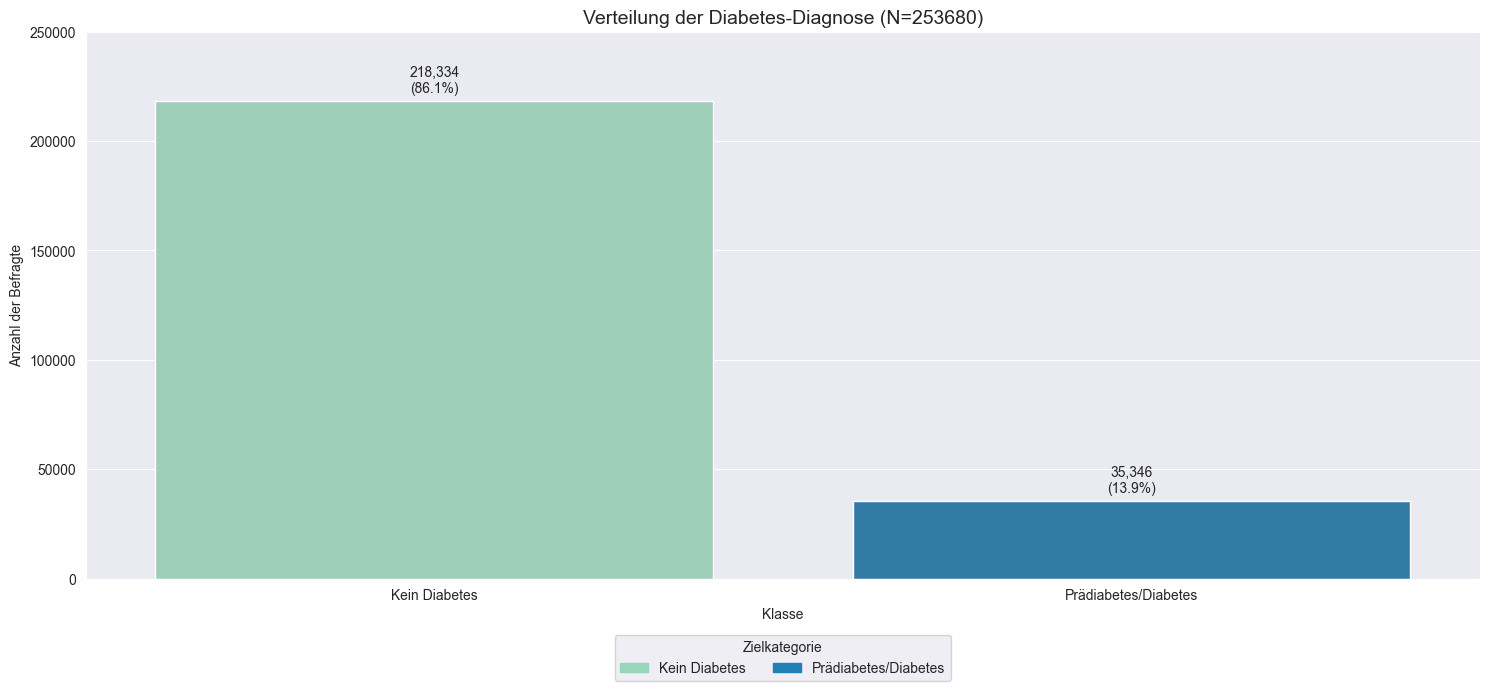

In [76]:
colors = sns.color_palette("YlGnBu", n_colors=2)
target_labels = {0: 'Kein Diabetes', 1: 'Prädiabetes/Diabetes'}

plt.figure(figsize=(15, 7))
ax = sns.countplot(x='Diabetes_binary', data=y, palette=colors, hue='Diabetes_binary', legend=False)
plt.title('Verteilung der Diabetes-Diagnose (N=253680)', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels([target_labels[i] for i in [0, 1]])
plt.xlabel('Klasse')
plt.ylabel('Anzahl der Befragte')
plt.ylim(0,250000)

for p in ax.patches:
    count = int(p.get_height())
    pct = count / len(X) * 100
    ax.text(p.get_x() + p.get_width() / 2,
            count + len(X)*0.01,
            f'{count:,}\n({pct:.1f}%)',
            ha='center', va='bottom')

legend_handles = [Patch(color=c, label=target_labels[i]) for i, c in zip([0, 1], colors)]
plt.legend(handles=legend_handles, title='Zielkategorie', loc='lower center', bbox_to_anchor=(0.5, -0.2), frameon=True, ncol=2)


plt.tight_layout()
plt.show()

Bei der Zielvariable weist es eine unausgewogene Klassenverteilung auf. Es gibt nur rund 14% der Befragte mit Prädiabetes oder Diabetes. Diese Ungleicheit ist nämlich 1 zu 7, jedoch typisch für klinisch Stichproben.

### 2.2. Multivariate Analyse

#### 2.2.1. Überblick zur Korrelation

In [77]:
# Features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_binary']
ordinal_features = ['GenHlth', 'Age', 'Education', 'Income']
nominal = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'GenHlth', 'Age', 'Education', 'Income']
numeric_features = ['BMI', 'MentHlth', 'PhyHlth']

Plot saved as: plot_0777c170.png


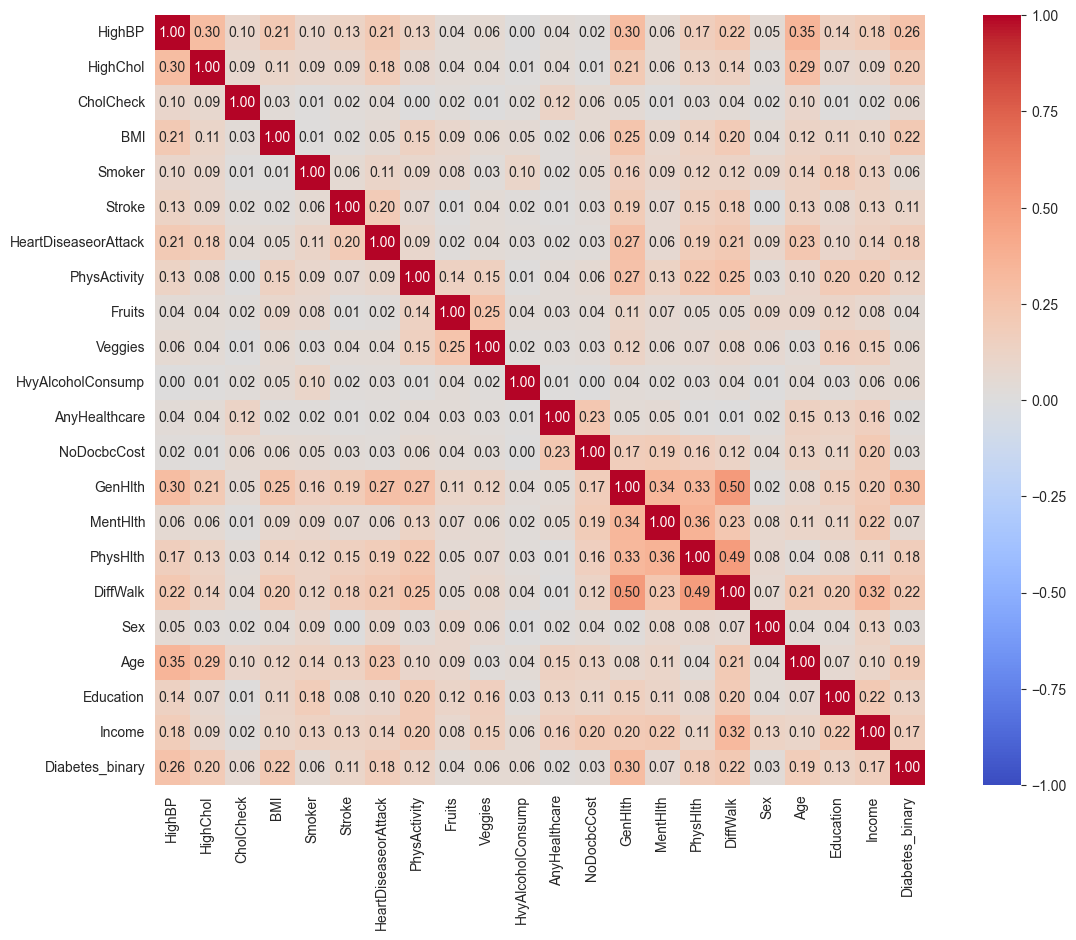

{'corr':                         HighBP  HighChol  CholCheck       BMI    Smoker  \
 HighBP                1.000000  0.298185   0.098467  0.213748  0.096963   
 HighChol              0.298185  1.000000   0.085598  0.106722  0.091270   
 CholCheck             0.098467  0.085598   1.000000  0.034495  0.009707   
 BMI                   0.213748  0.106722   0.034495  1.000000  0.013804   
 Smoker                0.096963  0.091270   0.009707  0.013804  1.000000   
 Stroke                0.129540  0.092579   0.024023  0.020153  0.061120   
 HeartDiseaseorAttack  0.209339  0.180741   0.044126  0.052904  0.114411   
 PhysActivity          0.125242  0.078012   0.003662  0.147294  0.087370   
 Fruits                0.040498  0.040803   0.023745  0.087518  0.077632   
 Veggies               0.061224  0.039814   0.005762  0.062275  0.030603   
 HvyAlcoholConsump     0.003420  0.011353   0.023602  0.048736  0.101582   
 AnyHealthcare         0.038355  0.042165   0.117561  0.018471  0.023147   
 NoD

In [78]:
from dython.nominal import associations
x_und_y = pd.concat([X,y], axis=1)
associations(x_und_y,
             nominal_columns=nominal, numerical_columns=numeric_features,
             nom_nom_assoc='cramer', num_num_assoc='pearson', nom_num_assoc='correlation_ratio',
             symmetric_nom_nom=True, symmetric_num_num=True,
             plot=True, figsize=(15, 10), cmap="coolwarm"
             )

#### 2.2.2. Zusammenhang von BMI mit höhem Bluttdruck, Diabetes und subjektivem Gesundheitszustand

Plot saved as: plot_96b5a42d.png


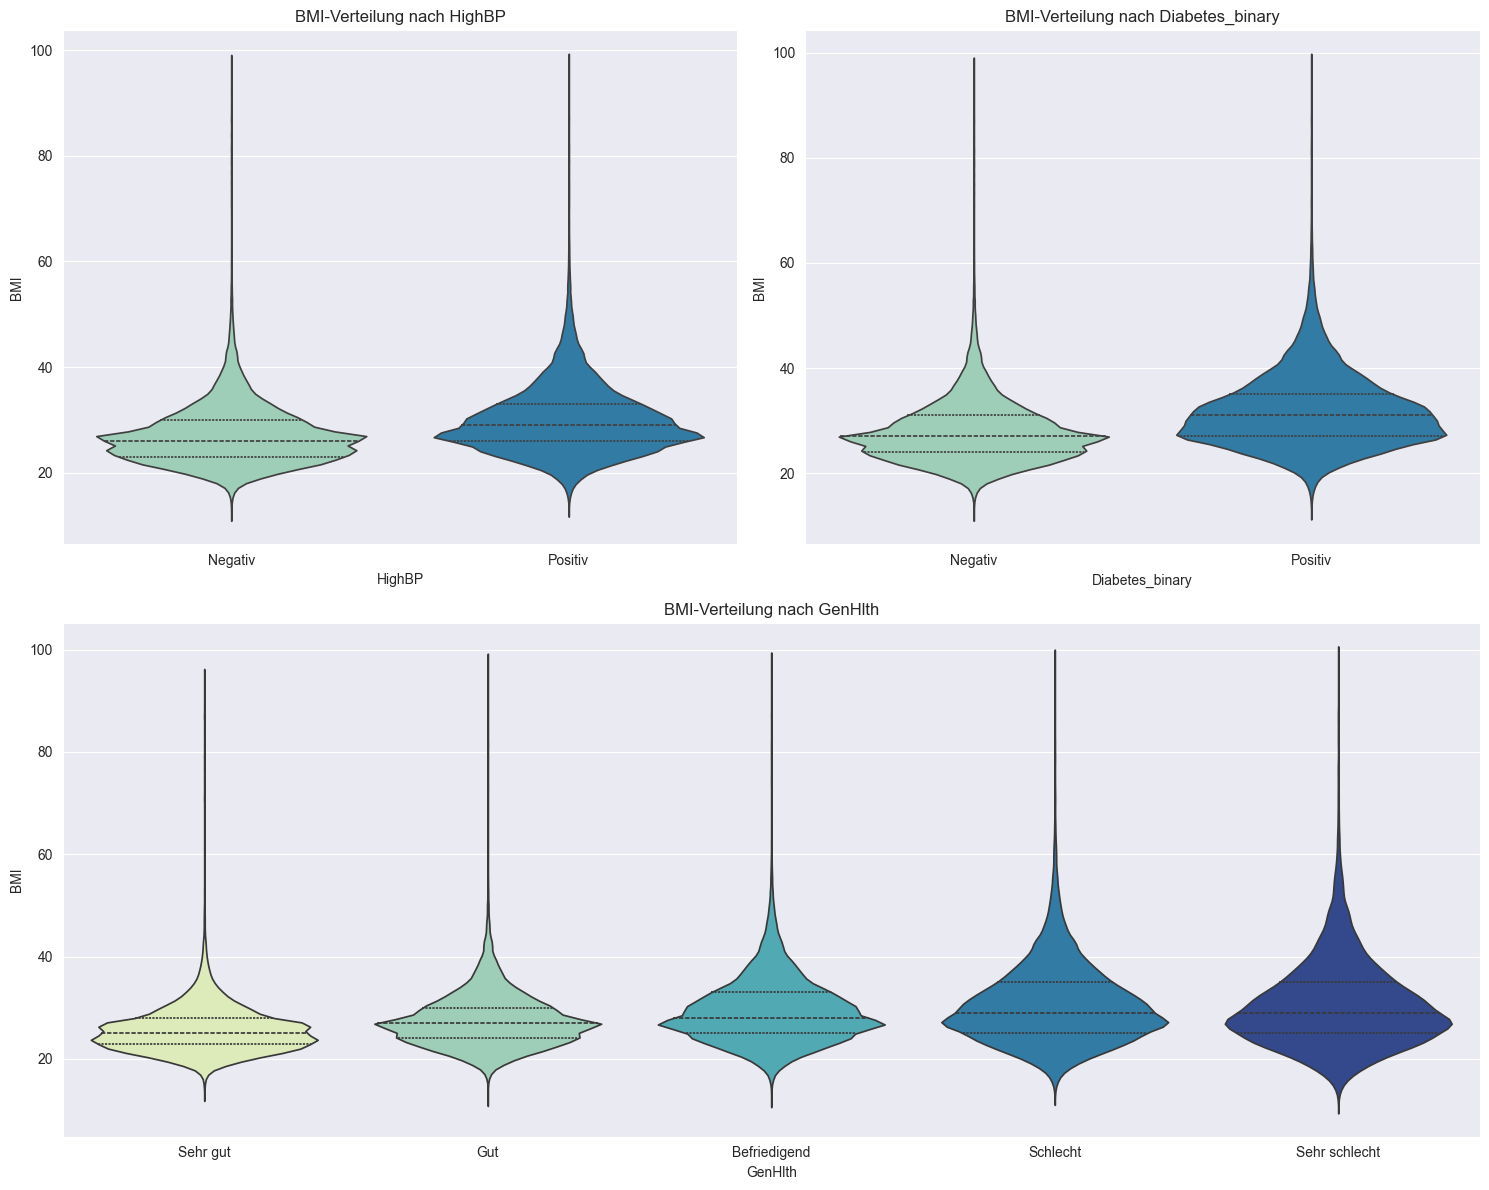

In [79]:
factors = ['HighBP', 'Diabetes_binary', 'GenHlth']

fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

axes = [ax1, ax2, ax3]

for ax, factor in zip(axes, factors):
    vals = sorted(x_und_y[factor].dropna().unique())
    if vals == [0, 1]:
        labels = ['Negativ', 'Positiv']
        palette = sns.color_palette("YlGnBu", n_colors=2)
    else:
        labels = ['Sehr gut','Gut','Befriedigend','Schlecht','Sehr schlecht']
        palette = sns.color_palette("YlGnBu", n_colors=5)

    sns.violinplot(
        data=x_und_y,
        x=factor,
        y='BMI',
        hue=factor,
        palette=palette,
        ax=ax,
        inner="quartile",
        legend=False
    )
    ax.set_xlabel(factor)
    ax.set_ylabel('BMI')
    ax.set_title(f'BMI-Verteilung nach {factor}')
    ax.set_xticks(range(len(vals)))
    ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

#### 2.2.3. Zusammenhang zwischen Alter und Gesundheitsrisiken

Plot saved as: plot_ff54e864.png


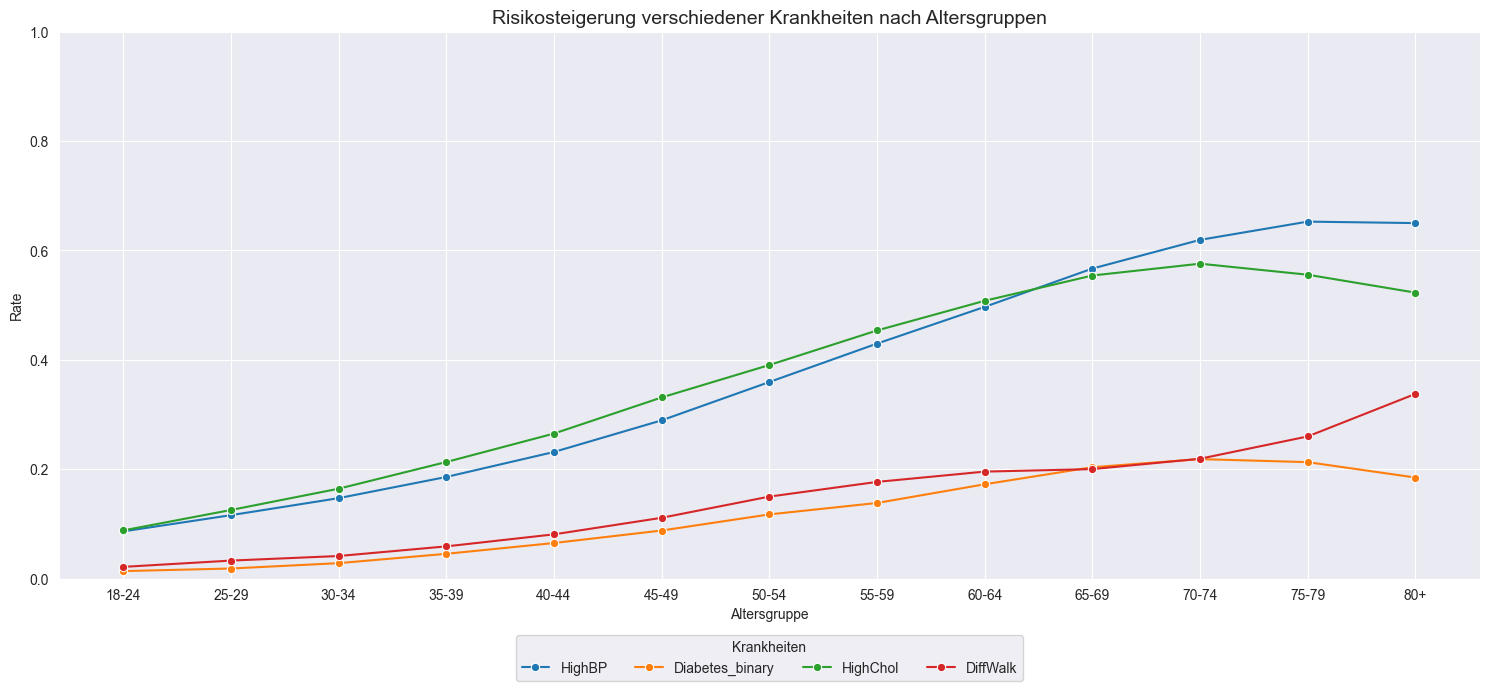

In [80]:
binary_features = ['HighBP', 'Diabetes_binary', 'HighChol', 'DiffWalk']

df_rates = []
for feat in binary_features:
    tmp = (
        x_und_y
        .groupby('Age')[feat]
        .mean()
        .reset_index(name='rate')
    )
    tmp['feature'] = feat
    df_rates.append(tmp)
df_rates = pd.concat(df_rates, ignore_index=True)


plt.figure(figsize=(15, 7))
sns.lineplot(
    data=df_rates,
    x='Age',
    y='rate',
    hue='feature',
    marker='o',
    dashes=False
)
plt.ylim(0, 1)
plt.xlabel('Altersgruppe')
plt.ylabel('Rate')
plt.title('Risikosteigerung verschiedener Krankheiten nach Altersgruppen', fontsize=14)
plt.xticks(range(1, 14), labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])
plt.legend(title='Krankheiten', loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, frameon=True)
plt.tight_layout()
plt.show()

#### 2.2.4. Zusammenhang von Diabetes und demografischen Angaben

Plot saved as: plot_25c74d7d.png


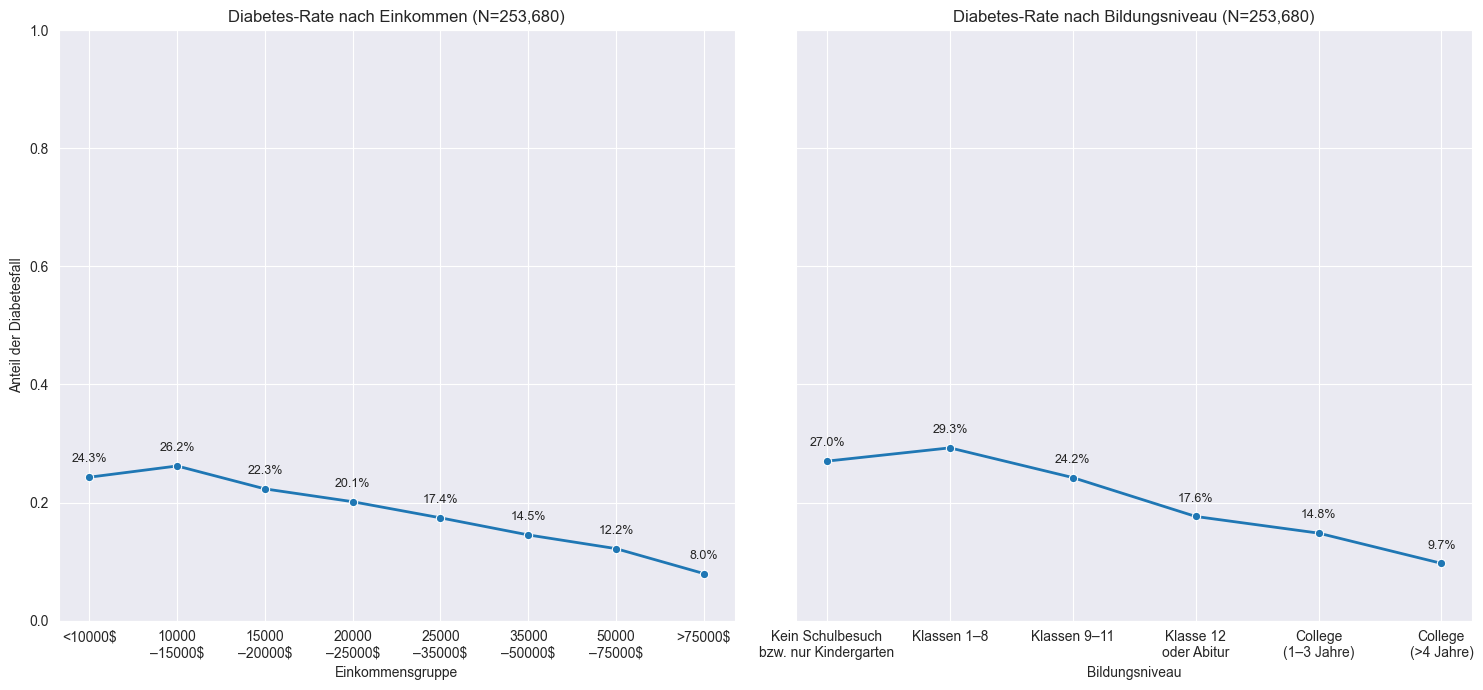

In [81]:
income_labels = {
    1: "<10000$",
    2: "10000\n–15000$",
    3: "15000\n–20000$",
    4: "20000\n–25000$",
    5: "25000\n–35000$",
    6: "35000\n–50000$",
    7: "50000\n–75000$",
    8: ">75000$"
}
edu_labels = {
    1: "Kein Schulbesuch\nbzw. nur Kindergarten",
    2: "Klassen 1–8",
    3: "Klassen 9–11",
    4: "Klasse 12\noder Abitur",
    5: "College\n(1–3 Jahre)",
    6: "College\n(>4 Jahre)"
}

income_series = X["Income"]
edu_series    = X["Education"]
diab_series   = y["Diabetes_binary"] if hasattr(y, "columns") else y

# --- 3) Raten berechnen ---
income_rates = (
    diab_series
    .groupby(income_series).mean()
    .reindex(list(income_labels.keys()))
)
edu_rates = (
    diab_series
    .groupby(edu_series).mean()
    .reindex(list(edu_labels.keys()))
)

fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(15, 7),
    sharey=True
)

ax = axes[0]
sns.lineplot(
    x=income_rates.index,
    y=income_rates.values,
    marker="o",
    linewidth=2,
    ax=ax
)
for x_pos, rate in zip(income_rates.index, income_rates.values):
    ax.text(x_pos, rate+0.02, f"{rate:.1%}", ha="center", va="bottom", fontsize=9)

ax.set_ylim(0, 1)
ax.set_xlabel("Einkommensgruppe")
ax.set_ylabel("Anteil der Diabetesfall")
ax.set_title(f"Diabetes-Rate nach Einkommen (N={len(diab_series):,})")
ax.set_xticks(list(income_labels.keys()))
ax.set_xticklabels([income_labels[i] for i in income_rates.index], rotation=0, ha="center")

ax = axes[1]
sns.lineplot(
    x=edu_rates.index,
    y=edu_rates.values,
    marker="o",
    linewidth=2,
    ax=ax
)

for x_pos, rate in zip(edu_rates.index, edu_rates.values):
    ax.text(x_pos, rate+0.02, f"{rate:.1%}", ha="center", va="bottom", fontsize=9)

ax.set_ylim(0, 1)
ax.set_xlabel("Bildungsniveau")
ax.set_title(f"Diabetes-Rate nach Bildungsniveau (N={len(diab_series):,})")
ax.set_xticks(list(edu_labels.keys()))
ax.set_xticklabels([edu_labels[i] for i in edu_rates.index], rotation=0, ha="center")

plt.tight_layout()
plt.show()
